## DATA VISUALIZATION

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
def create_connection(db_file, delete_db=False):
    import os
    if delete_db and os.path.exists(db_file):
        os.remove(db_file)

    conn = None
    try:
        conn = sqlite3.connect(db_file)
        conn.execute("PRAGMA foreign_keys = 1")
    except Error as e:
        print(e)

    return conn


def execute_many_sql_statement(sql_statement, conn, values):
    cur = conn.cursor()

    cur.executemany(sql_statement, values)

    rows = cur.fetchall()

    return rows


In [3]:
df=pd.read_csv("C:\\Users\\ranab\\Downloads\\Python final project\\accident-data.csv")
df.head(5)

,accident_index,accident_year,accident_reference,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,...,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area
0,1,2020,10219808,-0.254001,51.462262,3,1,1,4/2/2020,3,...,6,0,9,9,1,9,9,0,0,1
1,2,2020,10220496,-0.139253,51.470327,3,1,2,27/04/2020,2,...,6,0,0,4,1,1,1,0,0,1
2,3,2020,10228005,-0.178719,51.529614,3,1,1,1/1/2020,4,...,6,0,0,0,4,1,2,0,0,1
3,4,2020,10228006,-0.001683,51.541210,2,1,1,1/1/2020,4,...,6,0,0,4,4,1,1,0,0,1
4,5,2020,10228011,-0.137592,51.515704,3,1,2,1/1/2020,4,...,5,0,0,0,4,1,1,0,0,1


In [4]:
conn = sqlite3.connect("RoadSafety (2).db")
cur = conn.cursor()

# No of accidents w.r.t Road type

In [5]:
sql_statement5='''select sum(NoOfCasualities), r.RoadTypeDesc from Accident a inner JOIN AccidentDetails ad on a.AccidentID = ad.AccidentID inner join RoadType r on ad.RoadTypeID = r.RoadTypeID group by r.RoadTypeID HAVING r.RoadTypeID NOT IN (-1,9)  order by sum(NoOfCasualities) desc; 
'''

In [6]:
cur.execute(sql_statement5)
rows5=cur.fetchall()
C = []
L = []
for i in rows5:
    C.append(i[1])
    L.append(i[0])

Text(0, 0.5, 'Number of casualities')

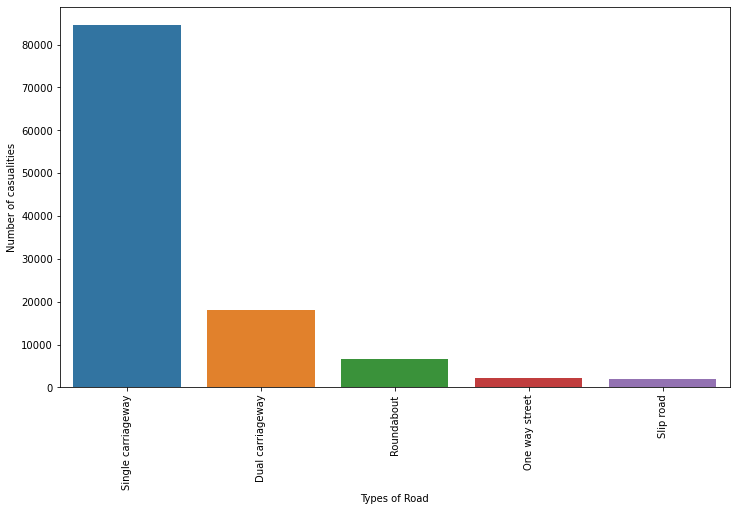

In [7]:
plt.figure(figsize=(12,7))
plt.xticks(rotation=90)
sns.barplot(x=C,y=L)
plt.xlabel('Types of Road')
plt.ylabel('Number of casualities')

# No of Casualities w.r.t Road surface

In [8]:
sql_statement6='''select sum(NoOfCasualities), r.RoadSurfaceDesc from Accident a inner JOIN AccidentDetails ad on a.AccidentID = ad.AccidentID inner join RoadSurfaceConditions r on ad.RoadSurfaceID = r.RoadSurfaceID group by r.RoadSurfaceID HAVING r.RoadSurfaceID NOT IN (-1,9)  order by sum(NoOfCasualities) desc;
'''

In [10]:
cur.execute(sql_statement6)
rows6=cur.fetchall()
print(rows6)
C = []
L = []
for i in rows6:
    C.append(i[1])
    L.append(i[0])

[(78536, 'Dry'), (34311, 'Wet or Damp'), (981, 'Frost or Ice'), (252, 'Flood over 3cm. deep'), (203, 'Snow')]


Text(0, 0.5, 'Number of casualities')

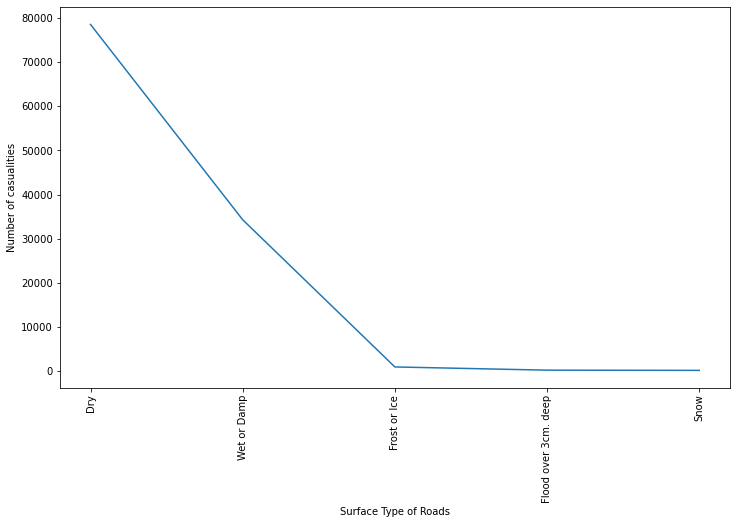

In [152]:
plt.figure(figsize=(12,7))
plt.xticks(rotation=90)
sns.lineplot(x=C,y=L)
plt.xlabel('Surface Type of Roads')
plt.ylabel('Number of casualities')

# No of Casualities w.r.t Weather Conditions

In [153]:
sql_statement7='''select sum(NoOfCasualities), w.WeatherConditionDesc from Accident a inner JOIN AccidentDetails ad on a.AccidentID = ad.AccidentID inner join WeatherConditions w on ad.WeatherConditionID = W.WeatherConditionID group by w.WeatherConditionID HAVING w.WeatherConditionID NOT IN (-1,8,9)  order by sum(NoOfCasualities) desc; 
 '''

In [171]:
cur.execute(sql_statement7)
rows7=cur.fetchall()
C = []
L = []
for i in rows7:
    C.append(i[1])
    L.append(i[0])

Text(0, 0.5, 'Number of casualities')

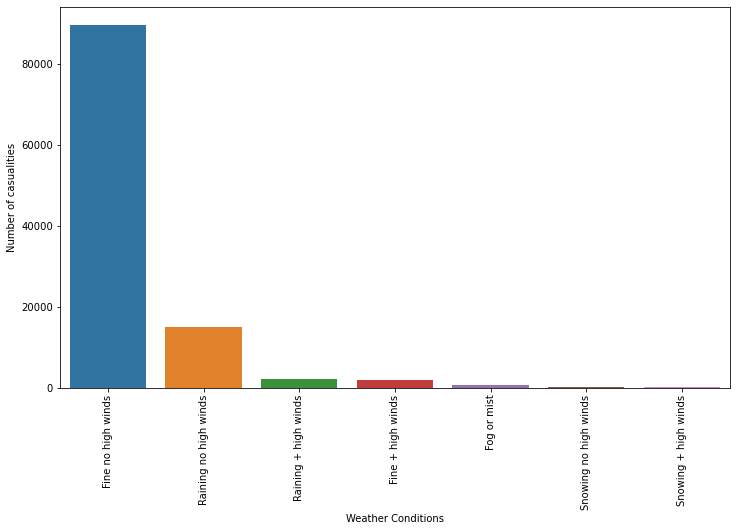

In [172]:
plt.figure(figsize=(12,7))
plt.xticks(rotation=90)
sns.barplot(x=C,y=L)
plt.xlabel('Weather Conditions')
plt.ylabel('Number of casualities')

# No of accidents w.r.t No of Vehicles

In [156]:
sql_statement8='''select a.NoOfVehicles, count(a.AccidentID) as NoOfAccidents from Accident a inner join  AccidentDetails ad on a.AccidentID = ad.AccidentID inner join Severity s on ad.SeverityID = s.SeverityID and s.SeverityDesc = 'Fatal' group by a.NoOfVehicles order by count(a.AccidentID) desc;
'''

In [160]:
cur.execute(sql_statement8)
rows8=cur.fetchall()
C = []
L = []
for i in rows8:
    C.append(i[1])
    L.append(i[0])
print(C)
print(L)

[662, 525, 142, 41, 7, 7, 4, 3]
[1, 2, 3, 4, 6, 5, 8, 7]


Text(0.5, 0, 'No. of Vehicles')

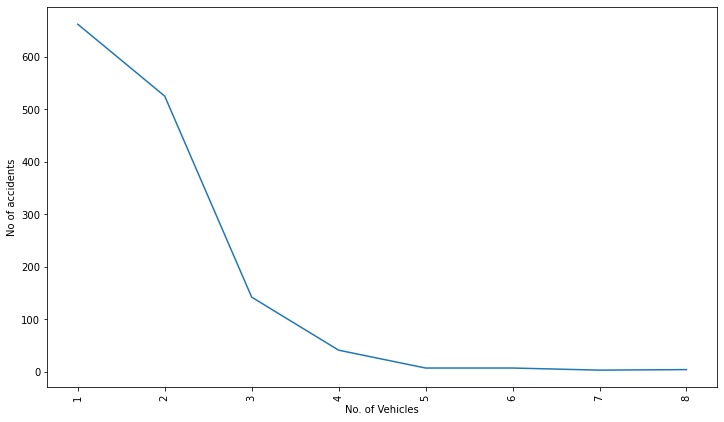

In [158]:
plt.figure(figsize=(12,7))
plt.xticks(rotation=90)
sns.lineplot(x=L,y=C)
plt.ylabel('No of accidents')
plt.xlabel('No. of Vehicles')

# hours w.r.t No of accidents

In [168]:
sql_statement9='''SELECT strftime ('%H',TimeStamp) as Hour, COUNT(*) as NoOfAccidents FROM Accident GROUP BY strftime ('%H',TimeStamp) order by COUNT(*) DESC; 
'''

In [169]:
cur.execute(sql_statement9)
rows9=cur.fetchall()
C = []
L = []
for i in rows9:
    C.append(i[1])
    L.append(i[0])
print(L)
print(C)

['17', '16', '15', '18', '14', '13', '12', '08', '19', '11', '10', '09', '07', '20', '21', '22', '06', '23', '00', '01', '05', '02', '03', '04']
[7813, 7381, 7361, 6618, 6245, 5741, 5395, 5267, 5048, 4812, 4173, 3917, 3736, 3715, 3106, 2555, 1830, 1796, 1188, 915, 855, 658, 566, 508]


Text(0, 0.5, 'No of accidents')

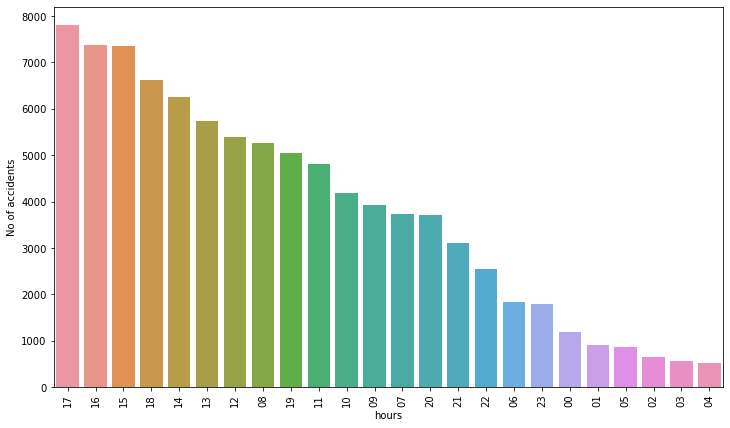

In [170]:
plt.figure(figsize=(12,7))
plt.xticks(rotation=90)
sns.barplot(x=L,y=C)
plt.xlabel('hours')
plt.ylabel('No of accidents')

# No of Casualities w.r.t Light Conditions

In [132]:
sql_statement10='''select sum(NoOfCasualities), l.LightConditionDesc from Accident a inner JOIN AccidentDetails ad on a.AccidentID = ad.AccidentID inner join LightConditions l on ad.LightConditionID = l.LightConditionID group by l.LightConditionID HAVING l.LightConditionID NOT IN (-1,7) order by sum(NoOfCasualities) desc;
'''

In [133]:
cur.execute(sql_statement10)
rows9=cur.fetchall()
C = []
L = []
for i in rows9:
    C.append(i[1])
    L.append(i[0])

([<matplotlib.patches.Wedge at 0x1d477d88b20>,
 [Text(-0.6918797936973913, 0.8551621782289343, 'Daylight'),
  Text(0.49137628447141535, -0.9841490471768323, 'Darkness - lights lit'),
  Text(1.068316308796819, -0.26210735273688895, 'Darkness - no lighting'),
  Text(1.0996980570056294, -0.025771756207975793, 'Darkness - lights unlit')])

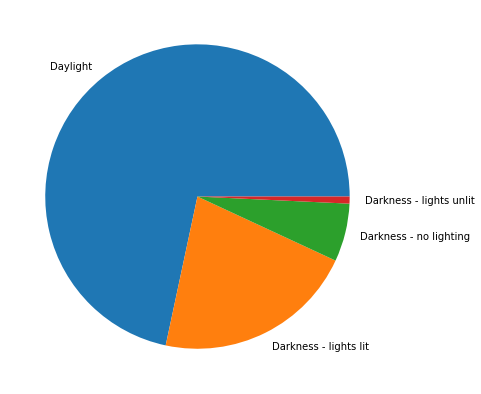

In [134]:
plt.figure(figsize=(12,7))
plt.xticks(rotation=90)
plt.pie(x=L,labels=C)
#plt.xlabel('No of accidents')
#plt.label('Number of hours')

# No of accidents w.r.t the days of weeks

In [135]:
sql_statement11='''SELECT CASE DayOfWeek when '2' THEN 'Monday' when '3' THEN 'Tuesday' when '4' THEN 'Wednesday' when '5' THEN 'Thursday' when '6' THEN 'Friday' when '7' THEN 'Saturday' when '1' THEN 'Sunday' END as DayOfWeek, COUNT(*) as NoOfAccidents FROM Accident GROUP BY DayOfWeek order by COUNT(*) DESC;  
'''

In [136]:
cur.execute(sql_statement11)
rows10=cur.fetchall()
C = []
L = []
for i in rows10:
    C.append(i[1])
    L.append(i[0])

Text(0, 0.5, 'No. of Accidents')

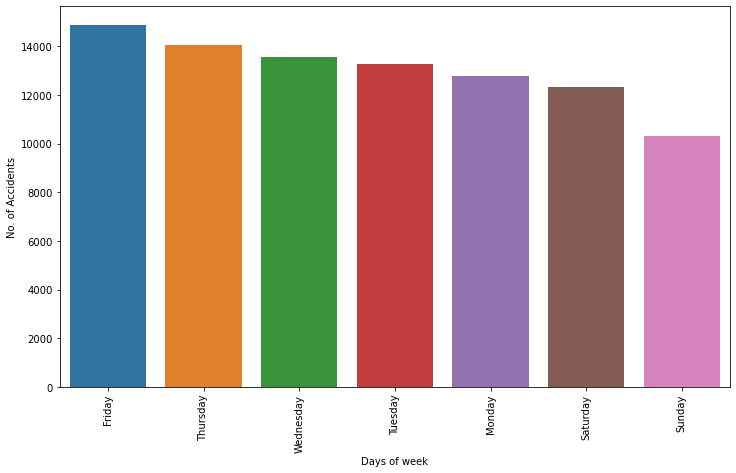

In [137]:
plt.figure(figsize=(12,7))
plt.xticks(rotation=90)
sns.barplot(x=L,y=C)
plt.xlabel('Days of week')
plt.ylabel('No. of Accidents')

# No of Accidents w.r.t Location

In [138]:
sql_statement12='''select count(*) as AccidentCount, CASE UrbanOrRural when '1' THEN 'Urban' ELSE 'Rural' END as UrbanOrRural from AccidentDetails where UrbanOrRural != 3 group by UrbanOrRural order by COUNT(*) DESC;'''

In [139]:
cur.execute(sql_statement12)
rows11=cur.fetchall()
C = []
L = []
for i in rows11:
    C.append(i[1])
    L.append(i[0])

([<matplotlib.patches.Wedge at 0x1d47800d5e0>,
 [Text(-0.5807830926623813, 0.9341793185879893, 'Urban'),
  Text(0.5807830926623812, -0.9341793185879894, 'Rural')])

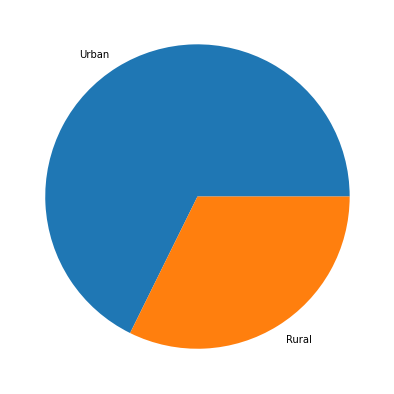

In [140]:
plt.figure(figsize=(12,7))
plt.xticks(rotation=90)
plt.pie(x=L,labels=C)